<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-и-предобработка-данных-" data-toc-modified-id="Открытие-и-предобработка-данных--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие и предобработка данных <a id="предобработка" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Вывод-" data-toc-modified-id="Вывод--1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод <a id="вывод1.1" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Анализ-данных-" data-toc-modified-id="Анализ-данных--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных <a id="анализ" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Виды-объектов-общественного-питания-" data-toc-modified-id="Виды-объектов-общественного-питания--2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Виды объектов общественного питания <a id="виды" rel="nofollow"></a></a></span></li><li><span><a href="#Сетевые/несетевые-заведения-" data-toc-modified-id="Сетевые/несетевые-заведения--2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сетевые/несетевые заведения <a id="сеть" rel="nofollow"></a></a></span></li><li><span><a href="#География-заведений-" data-toc-modified-id="География-заведений--2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>География заведений <a id="гео" rel="nofollow"></a></a></span></li><li><span><a href="#Вывод-" data-toc-modified-id="Вывод--2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод <a id="вывод2" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Общий-вывод-" data-toc-modified-id="Общий-вывод--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод <a id="общийвывод" rel="nofollow"></a></a></span></li></ul></div>

# Исследование рынка общественного питания в Москве.

Перед запуском проекта (кафе с роботами в роли обслуживающего персонала) нам необходимо изучить положение дел на рынке, чтобы понять, сможет ли наше кафе снискать популярность на долгое время. Для этого мы исследуем открытые данные о заведениях общественного питания в Москве. 

## Открытие и предобработка данных <a id="предобработка"></a> 

Для начала импортируем все библиотеки, которые потребуются нам в дальнейшей работе:

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from io import BytesIO
import requests

Прочитаем файл и ознакомимся с его содержимым:

In [2]:
rest_data = pd.read_csv('https://code.s3.yandex.net/datasets/rest_data.csv') 
    
display(rest_data.head())
rest_data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Чтобы исключить вероятность наличия неявных дубликатов, приведём все буквы в значениях столбца `object_name` к нижнему регистру:

In [3]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
print('Количество дубликатов:', rest_data.duplicated().sum())

Количество дубликатов: 0


### Вывод <a id="вывод1.1"></a> 

Итак, в нашей таблице отсутствуют пропуски и дубликаты, столбцы имеют корректные наименования и верные типы данных. Никакие изменения на этапе предобработки не требуются.

## Анализ данных <a id="анализ"></a> 

Проанализируем рынок общественного питания в Москве:
* посмотрим, какие виды общественного питания преобладают в столице и каковы их особенности;
* изучим сетевые и несетевые заведения Москвы;
* исследуем географическое распространение объектов общественного питания.

### Виды объектов общественного питания <a id="виды"></a> 

**Изучим соотношение видов объектов общественного питания по количеству:**

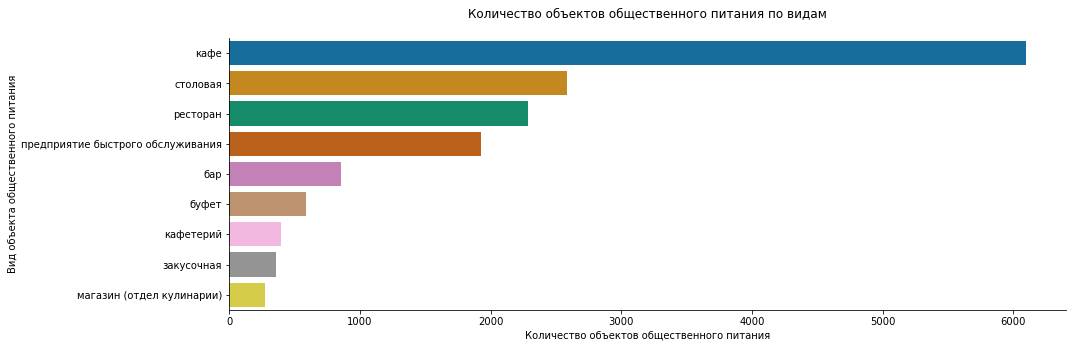

In [4]:
# создание сводной таблицы rest_1 с количеством id по каждому виду общепита (object_type)
rest_1 = rest_data.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index(drop=False)

# создание графика по rest_1
plt.figure(figsize=(15, 5))
sns.set_palette('colorblind')
rest_1 = sns.barplot(y='object_type', x='id', data=rest_1)
rest_1.set_title('Количество объектов общественного питания по видам' + '\n') 
rest_1.set_xlabel('Количество объектов общественного питания') 
rest_1.set_ylabel('Вид объекта общественного питания')
sns.despine();

Как мы видим, самый распространённый тип заведений - это **кафе**. За ним следуют такие виды как **столовая, ресторан и предприятие быстрого обслуживания**.

Посмотрим на среднее количество посадочных мест для каждого вида объекта общественного питания:

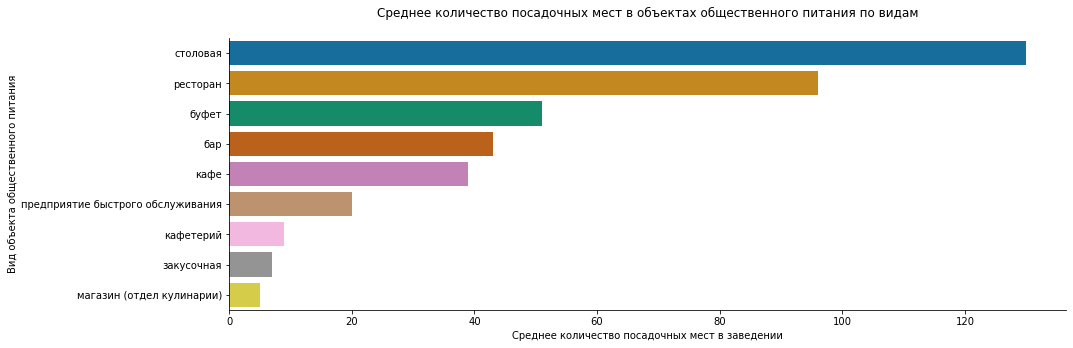

In [5]:
# создание сводной таблицы rest_2 со средним числом посадочных мест (number) по каждому виду общепита (object_type)
rest_2 = rest_data.groupby('object_type')['number'].mean().reset_index(drop=False).sort_values(by='number', ascending=False)
rest_2['number'] = rest_2['number'].astype(int) # изменение данных в столбце number с float на int

# создание графика по rest_2
plt.figure(figsize=(15, 5))
rest_2 = sns.barplot(y='object_type', x='number', data=rest_2)
rest_2.set_title('Среднее количество посадочных мест в объектах общественного питания по видам' + '\n') 
rest_2.set_xlabel('Среднее количество посадочных мест в заведении') 
rest_2.set_ylabel('Вид объекта общественного питания')
sns.despine();

**Наибольшее количество мест предлагают столовые (130) и рестораны (около 100)**. Наименьшее среднее количество посадочных мест в кафетериях, закусочных и отделах кулинарии.

### Сетевые/несетевые заведения <a id="сеть"></a> 

Проанализируем **соотношение сетевых и несетевых заведений**. 

Сначала посмотрим на значения сетевых ресторанов:

In [6]:
rest_data.query('chain == "да"').groupby('object_name')['id'].nunique().reset_index().head(10)

,object_name,id
0,beverly hills diner,1
1,bierloga,1
2,black & white,1
3,bocconcino,3
4,boobo,1
5,bubbleology,1
6,burger club,3
7,coffeeshop,1
8,coffeeshop company,4
9,cofix,25


Итак, перед нами обнажилось сразу две проблемы: 
* наименования ресторанов не единообразны. Так заведение "Кофешоп" в данном случае учтено как `coffeeshop` и `coffeeshop company`;
* отсюда вырастает вторая проблема - некорректно наименованные в файле сетевые рестораны после группировки по имени представлены только в единственном экземпляре. Либо это в действительности несетевые заведения, и тогда их статус необходимо скорректировать на `несетевое`.

Приведём наименования сетевых заведения к единообразию:

In [7]:
kfc = ['ростикс kfc', 'кафе «kfc»', 'kfc волгоградский', 'закусочная «kfc»', 'кафе kfc', 'пбо «kfc покрышкина»', 'пбо «kfc»', 'ресторан kfc', 'ресторан быстрого питания kfc', 'закусочная kfc', 'предприятие быстрого обслуживания «kfc»', 'ресторан «kfc»']
rest_data['object_name'] = rest_data['object_name'].replace(kfc, 'kfc')
starbucks = ['старбакс starbucks', 'кафе «сабвей» старбакс', 'кафе «старбакс»', 'старбакс', 'starbucks coffee', 'starbucks кофе', 'starbucks старбакс', 'starbucks, старбакс кофе', 'кафе starbucks', 'кафе «starbucks»', 'кофемания starbucks', 'старбакс кофе', 'кофейня «старбакс кофе»', 'кофейня «старбакс»', 'кафе «кофейня старбакс»']
rest_data['object_name'] = rest_data['object_name'].replace(starbucks, 'starbucks')
lounge = ['бар мята lounge', 'кальян- бар «мята lounge»', 'кальян-бар «мята lounge»', 'кальянная «мята lounge»', 'кальянная мята lounge', 'лаундж-бар «мята lounge»', 'мята lounge автозаводская', 'мята lounge октябрьская', 'мята lounge шаболовка']
rest_data['object_name'] = rest_data['object_name'].replace(lounge, 'мята lounge')
mac = ['предприятие быстрого обслуживания «макдоналдс»', 'ресторан «макдоналдс»', 'кафе макдоналдс', 'москва - макдоналдс', 'ресторан«макдоналдс»', 'кафе «макдоналдс»']
rest_data['object_name'] = rest_data['object_name'].replace(mac, 'макдоналдс')
terem = ['предприятие быстрого обслуживания «теремок»', 'кафе «теремок»', 'закусочная «теремок»', 'кафе теремок', 'пбо «теремок»', 'ресторан «теремок»', 'теремок инвест', 'теремок-инвест']
rest_data['object_name'] = rest_data['object_name'].replace(terem, 'теремок')
kroshka = ['кафе «крошка картошка»', 'закусочная «крошка картошка»', 'предприятие быстрого обслуживания «крошка картошка»', 'предприятие быстрого питания «крошка картошка»', 'ресторан быстрого питания «крошка картошка»']
rest_data['object_name'] = rest_data['object_name'].replace(kroshka, 'крошка картошка')
domino = ['dominos pizza', "пиццерия «домино'с пицца»", "домино'с пицца domino,s pizza", "кафе «домино'с пицца»", "предприятие быстрого обслуживания «домино'с пицца»", "ресторан «домино'с пицца»"]
rest_data['object_name'] = rest_data['object_name'].replace(domino, "домино'с пицца")
rest_data['object_name'] = rest_data['object_name'].replace(['шоколадница кофе хаус', 'шоколадница кофемания', 'кафе «шоколадница»', 'кофейня «шоколадница»', 'кофейня шоколадница'], "шоколадница")
rest_data['object_name'] = rest_data['object_name'].replace(['папа джонс пицца', 'пицерия «папа джонс»', 'пиццерия «папа джонс»', 'пиццерия папа джонс', 'кафе «папа джонс»'], "папа джонс")
prime = ['кафе «prime» прайм стар', 'prime прайм стар', 'prime star прайм стар', 'prime прайм стар прайм-кафе', 'кафе prime прайм стар', 'кафе prime прайм стар прайм-кафе', 'кафе «prime» (прайм стар)', 'кафе «прайм стар»', 'прайм стар кафе', 'прайм-кафе прайм стар', 'праймкафе прайм стар', 'праймстар', 'прайм-кафе', 'прайм']
rest_data['object_name'] = rest_data['object_name'].replace(prime, "прайм стар")
rest_data['object_name'] = rest_data['object_name'].replace(['предприятие быстрого обслуживания «додо пицца»', 'пиццерия «додо пицца»'], "додо пицца")
rest_data['object_name'] = rest_data['object_name'].replace(['бар «суши wok»', 'кафе «суши wok»', 'кафе суши wok', 'сеть магазинов «суши wok»', 'суши вок', 'кафе «суши вок»'], "суши wok")
rest_data['object_name'] = rest_data['object_name'].replace(['ресторан «бургер кинг»', 'предприятие быстрого обслуживания «бургер кинг»', 'кафе бургер кинг', 'кафе «бургер кинг»', 'закусочная «бургер кинг»', 'бургер кинг burger king', 'кафе-закусочная «бургер кинг»'], "бургер кинг")
rest_data['object_name'] = rest_data['object_name'].replace(['кафе «тануки»', 'ресторан «тануки»', 'ресторан тануки'], "тануки")
rest_data['object_name'] = rest_data['object_name'].replace(['ресторан «иль патио»', 'иль-патио', 'кафе «иль патио»', 'кафе иль патио «il patio»', 'шикари иль патио', 'иль патио планета суши'], "иль патио")
rest_data['object_name'] = rest_data['object_name'].replace(['сабвей', 'сабвей subway', 'сабвей сушивок', 'кафе «subway»'], "subway")
rest_data['object_name'] = rest_data['object_name'].replace(['«кафе «кулинарная лавка братьев караваевых»', '«кафе «кулинарная лавка братьев караваевых»»', 'братья караваевых', 'кафе «кулинарная лавка братьев караваевых»', 'братья караваевы'], "кулинарная лавка братьев караваевых")
rest_data['object_name'] = rest_data['object_name'].replace(['кафе «якитория»', 'ресторан «якитория»', 'кафе якитория', 'якитория и спорт бар', 'якитория и ян примус'], "якитория")
rest_data['object_name'] = rest_data['object_name'].replace(['кафе «кофе хаус»', 'кафе кофе-хаус', 'кофе хаус,экспресс', 'кофе хаус. экспрессо и капучино бар', 'кофе-хаус', 'кофейня «кофе хаус»'], "кофе хаус")
rest_data['object_name'] = rest_data['object_name'].replace(['готовые блюда милти','магазин готовой еды «милти»','предприятие быстрого обслуживания «милти»','точка продажи готовой еды милти'], "милти")
rest_data['object_name'] = rest_data['object_name'].replace(['кафе штолле', 'пироги штолле', 'пироговая штолле', 'кафе «штолле»', 'кафе «штолле»'], 'штолле')
rest_data['object_name'] = rest_data['object_name'].replace(['кафе быстрого питания му-му', 'кафе му-му', 'кафе «му-му»'], 'му-му')
rest_data['object_name'] = rest_data['object_name'].replace('кафе «баскин роббинс»', 'баскин роббинс')

Теперь, когда самые крупные сетевые рестораны носят корректные единые наименования, изменим статус оставшихся в единственном экземпляре заведений на несетевое:

In [8]:
# сделаем срез строк, в которых наименования сетевых ресторанов будут представлены только в одном экземпляре
chain = rest_data.query('chain == "да"').pivot_table(index='object_name', values='id', aggfunc=['max', 'count']).reset_index()
chain.columns = chain.columns.map('_'.join)
chain = chain.query('count_id == 1')

# создадим список id таких заведений
lst = chain["max_id"].tolist()

# для каждого id из списка lst изменим значение в столбце chain основной таблицы rest_data на "нет"
for elem in range(len(lst)):
    rest_data.loc[rest_data['id'] == lst[elem], 'chain'] = 'нет'

Данные по статусу заведения (сетевое/несетевое) более-менее приведены в порядок, можно посмотреть на их соотношение:

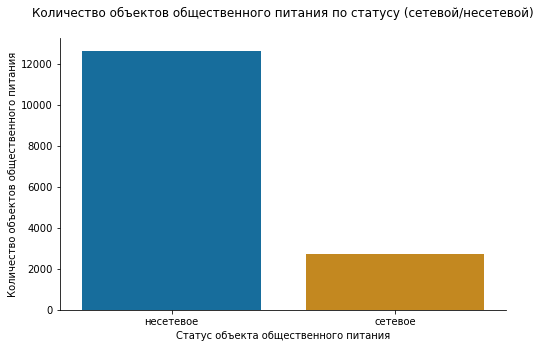

In [9]:
# изменим значения "да" и "нет" в столбце chain на "сетевое" и "несетевое" соответственно
rest_data['chain'] = rest_data['chain'].replace('да', 'сетевое')
rest_data['chain'] = rest_data['chain'].replace('нет', 'несетевое')

plt.figure(figsize=(8, 5))
rest_3 = rest_data.pivot_table(index='chain', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index(drop=False)
rest_3 = sns.barplot(y='id', x='chain', data=rest_3)
rest_3.set_title('Количество объектов общественного питания по статусу (сетевой/несетевой)' + '\n') 
rest_3.set_ylabel('Количество объектов общественного питания') 
rest_3.set_xlabel('Статус объекта общественного питания')
sns.despine();

**Несетевые рестораны по своему количеству однозначно лидируют на московском рынке общепита.**

Оценим, для какого вида объекта общественного питания всё же характерно сетевое распространение:

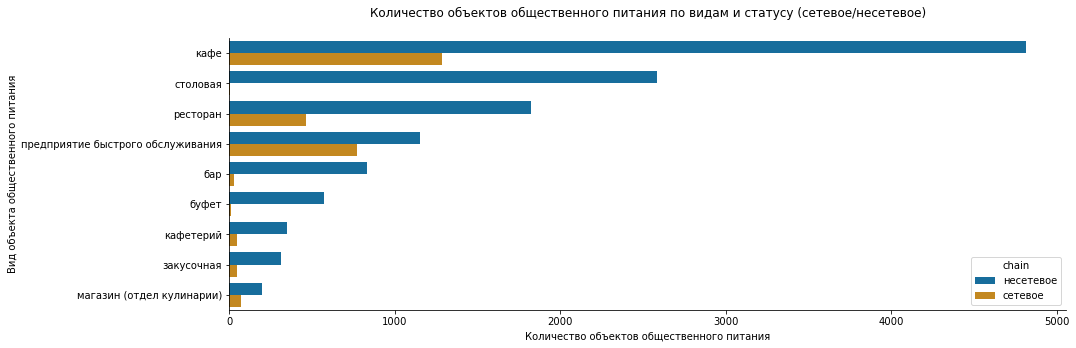

In [10]:
rest_4 = rest_data.groupby(['object_type', 'chain'], as_index=True)['id'].nunique().reset_index(drop=False).sort_values(by='id', ascending=False)
plt.figure(figsize=(15, 5))
rest_4 = sns.barplot(y='object_type', x='id', hue='chain', data=rest_4)
rest_4.set_title('Количество объектов общественного питания по видам и статусу (сетевое/несетевое)' + '\n') 
rest_4.set_xlabel('Количество объектов общественного питания') 
rest_4.set_ylabel('Вид объекта общественного питания')
sns.despine();

Согласно имеющимся данным, **предприятиям быстрого обслуживания наиболее свойственно сетевое распространение**, а вот столовые и буфеты почти не состоят в сетях общественного питания.

Изучим следующий вопрос: для сетевых заведений характерно много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

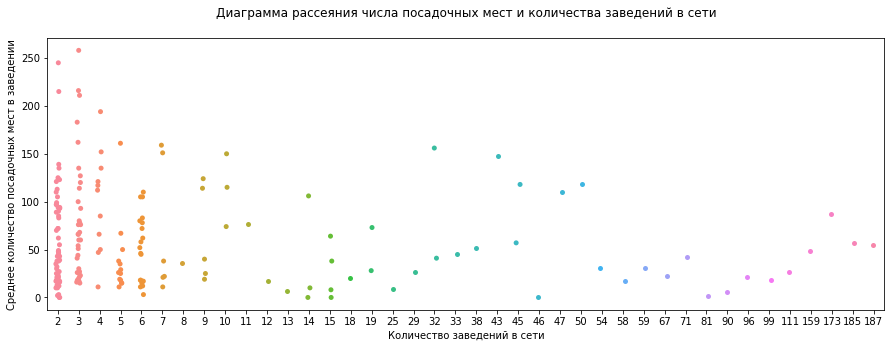

In [11]:
rest_5 = rest_data.query('chain == "сетевое"').pivot_table(index='object_name', values=['id', 'number'], aggfunc={'id': 'count', 'number': 'mean'}).sort_values(by='id', ascending=False).reset_index(drop=False)
rest_5['number'] = rest_5['number'].astype(int)
plt.figure(figsize=(15,5))
rest_5 = sns.stripplot(x='id', y='number', data=rest_5)
plt.title("Диаграмма рассеяния числа посадочных мест и количества заведений в сети" + '\n')
rest_5.set_xlabel('Количество заведений в сети') 
rest_5.set_ylabel('Среднее количество посадочных мест в заведении');

Как мы видим, в основном, **сетям характерно небольшое количество заведений в сетке (до семи) и до 100 посадочных мест**.

### География заведений <a id="гео"></a> 

Посмотрим, где именно в Москве наибольшее количество заведений общественного питания. Для этого сначала выделим в отдельный столбец информацию об улице расположения объекта:

In [12]:
street = rest_data['address'].str.split(",", n = 1, expand = True)
rest_data['streetname'] = street[1]
street_1 = rest_data['streetname'].str.split(",", n = 1, expand = True)
rest_data['streetname'] = street_1[0]
rest_data['streetname'] = rest_data['streetname'].str.strip()

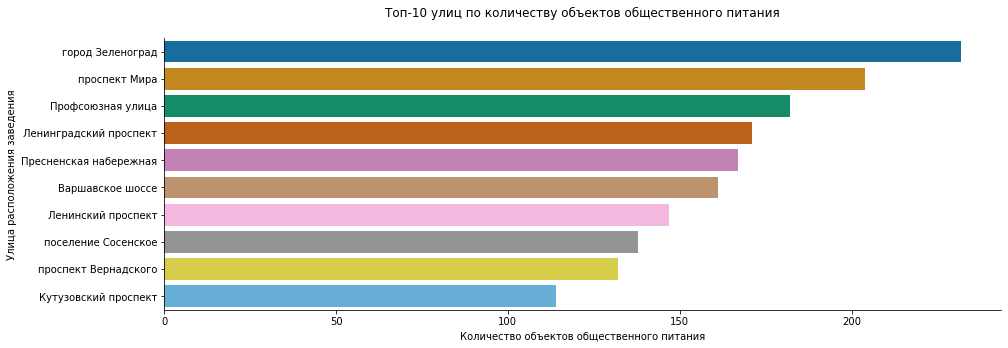

In [13]:
plt.figure(figsize=(15, 5))
top_10_streets = rest_data.pivot_table(index='streetname', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index(drop=False).head(10)
rest_6 = sns.barplot(y='streetname', x='id', data=top_10_streets)
rest_6.set_title('Топ-10 улиц по количеству объектов общественного питания' + '\n') 
rest_6.set_xlabel('Количество объектов общественного питания') 
rest_6.set_ylabel('Улица расположения заведения')
sns.despine();

Улицы с самым большим количеством заведений общественного питания - как логично предположить, являются самыми длинными в городе, за исключением Пресненской набережной, на которой расположен деловой центр "Москва Сити" с высокой концентрацией кафе и ресторанов. Также в топе Зеленоград - один из округов Москвы.

Посмотрим, в каких районах города они расположены. Для этого импортируем справочник улиц Москвы и присоединим данные о районах к таблице `top_10`:  

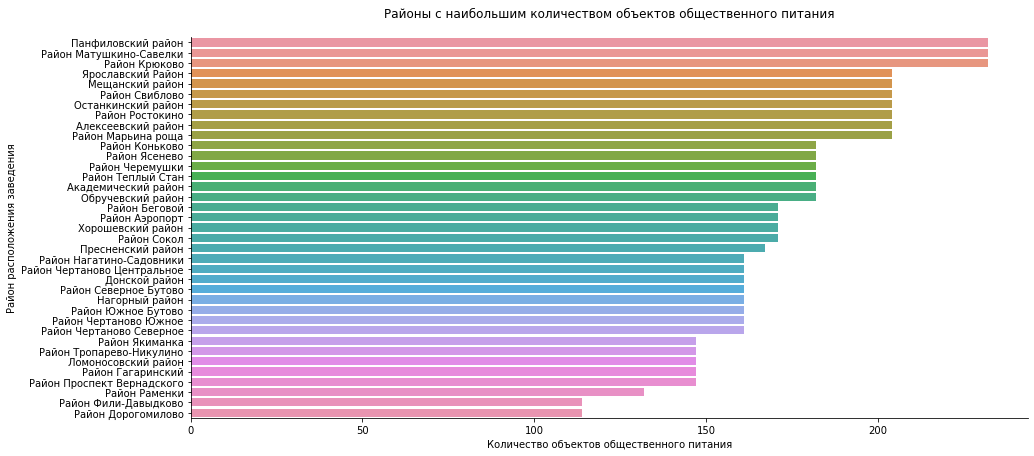

In [14]:
spreadsheet_id = '1kgm-bQF82hHbLxzQT2dzsFgRDENqDy28PqGvZJjlHZg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
area = pd.read_csv(BytesIO(r.content))

top_10_area = top_10_streets.merge(area[['streetname', 'area']], on='streetname', how='left').groupby('area')['id'].max().reset_index(drop=False).sort_values(by='id', ascending=False)
plt.figure(figsize=(15, 7))
rest_7 = sns.barplot(y='area', x='id', data=top_10_area)
rest_7.set_title('Районы с наибольшим количеством объектов общественного питания' + '\n') 
rest_7.set_xlabel('Количество объектов общественного питания') 
rest_7.set_ylabel('Район расположения заведения')
sns.despine();

Как мы уже ранее отметили, в топ-10 входят длинные улицы, пересекающие сразу несколько районов, поэтому и районов на графике не 10, а существенно больше.

Оценим распределение количества посадочных мест для улиц с большим количеством объектов общественного питания:

C:\Users\79215\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


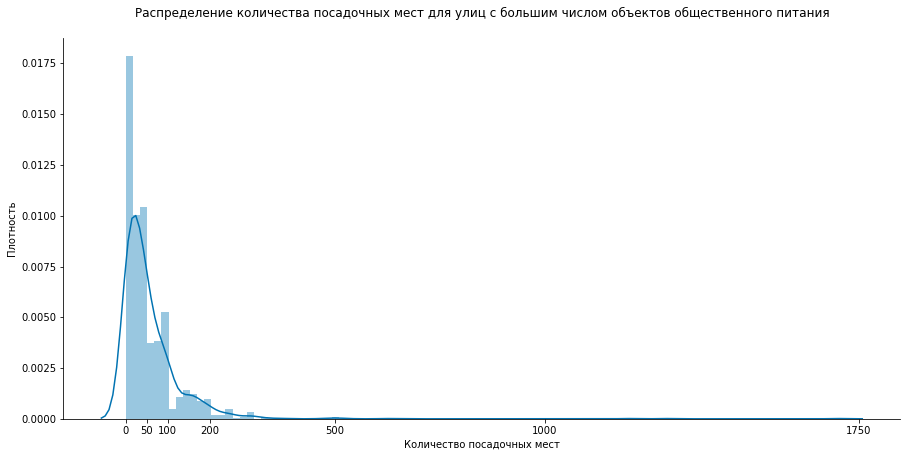

In [15]:
rest_8 = rest_data.merge(top_10_streets, on='streetname', how='right')

plt.figure(figsize=(15, 7))
rest_8 = sns.distplot(rest_8['number'], bins=100)
rest_8.set_title('Распределение количества посадочных мест для улиц с большим числом объектов общественного питания' + '\n') 
rest_8.set_xticks([0, 50, 100, 200, 500, 1000, 1750])
rest_8.set_xlabel('Количество посадочных мест') 
rest_8.set_ylabel('Плотность')
sns.despine();

На улицах с большим числом объектов общественного питания преобладают заведения с количеством посадочных мест **до 50 шт**. Также наблюдаются выбросы за 1000 и более посадочных мест.

Теперь, наоборот, найдём число улиц с наименьшим, то есть одним, объектом общественного питания:

In [16]:
only_rest = rest_data.pivot_table(index='streetname', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index(drop=False).query('id == 1')
print('Количество улиц одним объектом общественного питания:', len(only_rest))

Количество улиц одним объектом общественного питания: 579


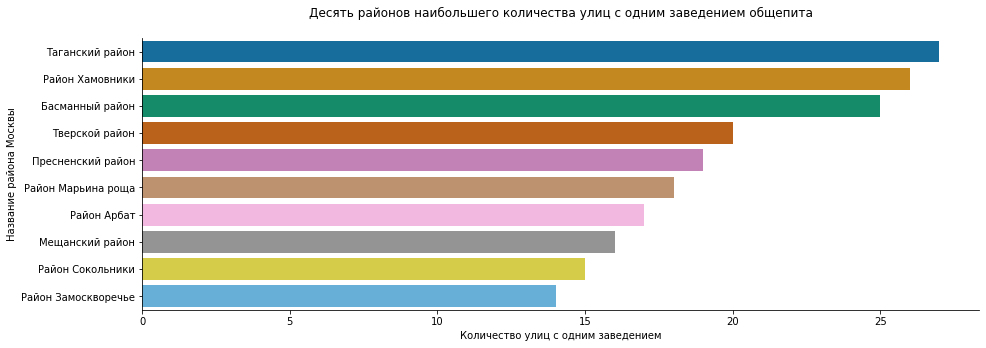

In [17]:
only_rest = only_rest.merge(area[['streetname', 'area']], on='streetname', how='left').groupby('area')['id'].count().reset_index(drop=False).sort_values(by='id', ascending=False).head(10)
plt.figure(figsize=(15, 5))
only_area_10 = sns.barplot(y='area', x='id', data=only_rest)
only_area_10.set_title('Десять районов наибольшего количества улиц с одним заведением общепита' + '\n') 
only_area_10.set_xlabel('Количество улиц с одним заведением') 
only_area_10.set_ylabel('Название района Москвы')
sns.despine();

Как мы видим, улицы с одним заведением общепита сконцентрированы в центральных районах города, где много маленьких улочек, тупиков, переулков и т.д.

### Вывод <a id="вывод2"></a> 

На этапе анализа данных мы пришли к следующим заключениям:
- самые распространённые типы заведений в Москве - это кафе, столовые, рестораны и предприятия быстрого обслуживания;
- самое большое среднее количество посадочных мест предлагают столовые (110-130) и рестораны (около 100);
- несетевых заведений в несколько раз больше, чем сетевых;
- сетевое распространение наиболее свойственно предприятиям быстрого обслуживания;
- сетевому распространению характерно мало заведений в сети с большим количеством посадочных мест;
- наибольшее количество заведений общественного питания на самых длинных улицах города, в районе делового центра "Москва Сити" и в Зеленограде;
- среди этих заведений преобладают объекты с количеством посадочных мест до 50 шт;
- в городе 579 заведений, которые единственные на своей улице - находятся они, в основном, в центральных районах столицы.

## Общий вывод <a id="общийвывод"></a> 

**Мы исследовали открытые данные о заведениях общественного питания в Москве, изучив положение дел на рынке, и пришли к следующим выводам:**
- в ходе работы с данными было обнаружено **отсутствие в единообразии наименований ресторанов**. Так как информация получена нами из открытых источников, повлиять на её составление/формирование мы не можем, поэтому наименования ресторанов были скорректированы нами в ручном режиме;
- выявлено, что самые распространённые типы заведений в Москве - **кафе, столовые, рестораны и предприятия быстрого обслуживания**. При этом столовые и рестораны, в среднем, предлагают больше всего посадочных мест (от 100 шт). В кафе, в среднем, около 40 посадочных мест, в предприятиях быстрого обслуживания - 20;
- анализ показал, что **несетевые заведения по количеству превосходят сетевые** в несколько раз. При этом несетевое распространение преобладает над сетевым у всех видов объектов общественного питания. В сравнении с другими видами заведений, сетевое распространение наиболее свойственно предприятиям быстрого обслуживания. Также исследование подемонстрировало, что сетевому распространению характерно **мало заведений в сети с большим количеством посадочных мест**;
- мы нашли **10 улиц с наибольшим количество заведений общественного питания** - это самые длинные улицы города, район делового центра "Москва Сити" и Зеленоград. В объектах на этих улицах, в основном, до 50 посадочных мест. Кроме того мы посчитали, что в столице **579 улиц, на которых находится по одному заведению общественного питания** - преимущественно эти улицы сконцентрированы в центральных районах города.


Исходя из полученных данных, мы можем сформировать картину "среднего", самого распространённого заведения общественного питания в Москве: **это несетевое кафе на 40 посадочных мест, находящееся на одной главных городских артерий**.

Дополнительно отметим, что для более точных прогнозов о перспективности проекта по открытию кафе необходимо учитывать пешеходный трафик (проходимость людей) в том или ином районе, средние чеки потенциальных конкурентов и иные более конкретные метрики, позволяющие оценить риски и возможности.

**С презентацией можно ознакомиться по ссылке:** https://drive.google.com/file/d/1Bl2gEKM8enfeObQz4Trxh5hzELas6dbu/view?usp=sharing